In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasist.structdata import detect_outliers

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm
import statsmodels.stats.api as sms

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

## Univariant

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris = iris[['petal_length', 'petal_width']]
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [5]:
x = iris['petal_length']
y = iris['petal_width']

<Axes: xlabel='petal_length', ylabel='petal_width'>

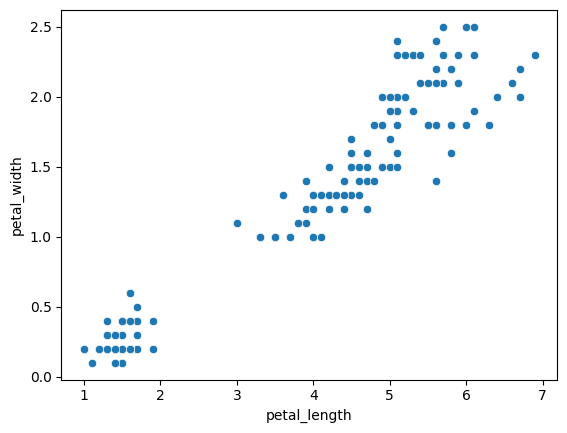

In [6]:
sns.scatterplot(x=x, y=y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=23)

In [8]:
x_train

77     5.0
29     1.6
92     4.0
23     1.7
128    5.6
      ... 
39     1.5
91     4.6
31     1.5
40     1.3
83     5.1
Name: petal_length, Length: 90, dtype: float64

In [9]:
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[5. ],
       [1.6],
       [4. ],
       [1.7],
       [5.6],
       [4. ],
       [4.8],
       [5.6],
       [5.1],
       [4.9],
       [1.4],
       [1.6],
       [5.6],
       [1.4],
       [1.6],
       [5.5],
       [5.1],
       [4. ],
       [1.4],
       [4.1],
       [5.3],
       [4.5],
       [5.8],
       [6.6],
       [4.3],
       [1.3],
       [4. ],
       [4.9],
       [4.9],
       [4. ],
       [1.5],
       [4.5],
       [4.5],
       [3.9],
       [5. ],
       [4.8],
       [3.8],
       [5.1],
       [6.3],
       [6.1],
       [1.2],
       [5.7],
       [3. ],
       [1.5],
       [5.9],
       [4.8],
       [1.4],
       [4.5],
       [4.2],
       [5.2],
       [1.3],
       [1. ],
       [3.5],
       [1.1],
       [4.7],
       [4.2],
       [1.2],
       [5.8],
       [4.3],
       [4.5],
       [1.6],
       [6.9],
       [4.6],
       [5.1],
       [5.6],
       [4.7],
       [1.5],
       [1.6],
       [5.5],
       [5.8],
       [4.4],
      

In [10]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[5.4],
       [6. ],
       [4.1],
       [1.5],
       [5. ],
       [4.9],
       [1.7],
       [5.5],
       [1.7],
       [3.6],
       [4.7],
       [1.6],
       [5.9],
       [1.5],
       [1.5],
       [5.1],
       [4.5],
       [4.7],
       [6.1],
       [1.4],
       [5.3],
       [1.4],
       [1.6],
       [1.3],
       [5.6],
       [1.4],
       [1.9],
       [4.8],
       [4.4],
       [3.9],
       [1.5],
       [3.9],
       [1.3],
       [6.7],
       [1.5],
       [1.7],
       [4.6],
       [3.3],
       [4.2],
       [6. ],
       [5.7],
       [1.9],
       [3.7],
       [1.4],
       [4.4],
       [5. ],
       [4.5],
       [6.4],
       [1.5],
       [4.1],
       [6.1],
       [5.4],
       [1.4],
       [5.6],
       [4.5],
       [4.7],
       [6.7],
       [4.2],
       [1.4],
       [5.1]])

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
c = model.intercept_
c 

-0.35113274221437507

In [27]:
m = model.coef_
m 

array([0.41684538])

In [14]:
# y_pred_train = m*x_train + c
# y_pred_train.flatten()

In [28]:
# or use 
y_pred_train = model.predict(x_train)
y_pred_train

array([1.73309416, 0.31581987, 1.31624878, 0.3575044 , 1.98320139,
       1.31624878, 1.64972508, 1.98320139, 1.7747787 , 1.69140962,
       0.23245079, 0.31581987, 1.98320139, 0.23245079, 0.31581987,
       1.94151685, 1.7747787 , 1.31624878, 0.23245079, 1.35793332,
       1.85814777, 1.52467147, 2.06657046, 2.40004677, 1.44130239,
       0.19076625, 1.31624878, 1.69140962, 1.69140962, 1.31624878,
       0.27413533, 1.52467147, 1.52467147, 1.27456424, 1.73309416,
       1.64972508, 1.2328797 , 1.7747787 , 2.27499315, 2.19162408,
       0.14908171, 2.02488593, 0.8994034 , 0.27413533, 2.108255  ,
       1.64972508, 0.23245079, 1.52467147, 1.39961786, 1.81646324,
       0.19076625, 0.06571264, 1.10782609, 0.10739718, 1.60804055,
       1.39961786, 0.14908171, 2.06657046, 1.44130239, 1.52467147,
       0.31581987, 2.52510038, 1.56635601, 1.7747787 , 1.98320139,
       1.60804055, 0.27413533, 0.31581987, 1.94151685, 2.06657046,
       1.48298693, 0.19076625, 1.81646324, 1.02445701, 2.02488

Text(0, 0.5, 'petal width')

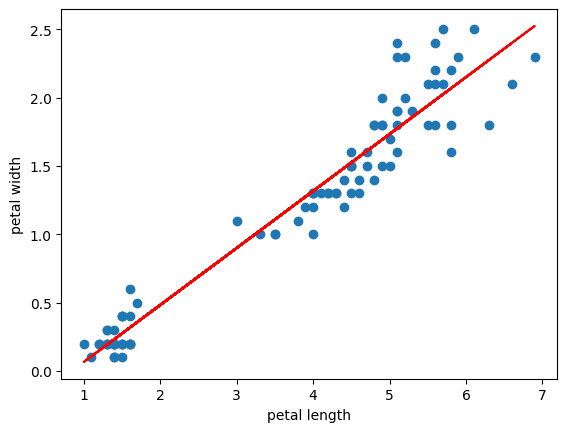

In [29]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'red')
plt.xlabel("petal length")
plt.ylabel("petal width")

In [30]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1.89983231, 2.14993954, 1.35793332, 0.27413533, 1.73309416,
       1.69140962, 0.3575044 , 1.94151685, 0.3575044 , 1.14951063,
       1.60804055, 0.31581987, 2.108255  , 0.27413533, 0.27413533,
       1.7747787 , 1.52467147, 1.60804055, 2.19162408, 0.23245079,
       1.85814777, 0.23245079, 0.31581987, 0.19076625, 1.98320139,
       0.23245079, 0.44087348, 1.64972508, 1.48298693, 1.27456424,
       0.27413533, 1.27456424, 0.19076625, 2.44173131, 0.27413533,
       0.3575044 , 1.56635601, 1.02445701, 1.39961786, 2.14993954,
       2.02488593, 0.44087348, 1.19119517, 0.23245079, 1.48298693,
       1.73309416, 1.52467147, 2.31667769, 0.27413533, 1.35793332,
       2.19162408, 1.89983231, 0.23245079, 1.98320139, 1.52467147,
       1.60804055, 2.44173131, 1.39961786, 0.23245079, 1.7747787 ])

Text(0, 0.5, 'petal width')

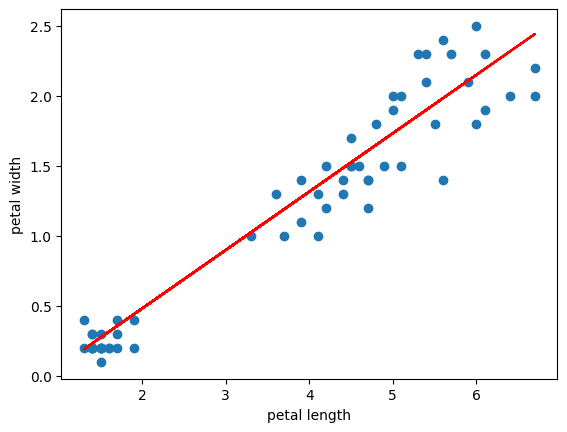

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'red')
plt.xlabel("petal length")
plt.ylabel("petal width")

## Evaluation

In [32]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

In [39]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [33]:
# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_test)

In [34]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)

In [35]:
# Perform Residual Analysis (optional)
residuals = y_test - y_pred_test

In [36]:
# Calculate Durbin-Watson Statistic (optional)
durbin_watson = sms.durbin_watson(residuals)

In [37]:
# Step 8: Check Normality of Residuals (optional)
p_value = sms.jarque_bera(residuals)[1]
is_residuals_normal = p_value > 0.05  # If True, residuals are normally distributed

In [40]:
# Step 9: Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22
R-squared (R2): 0.92
Mean Absolute Error (MAE): 0.17


In [41]:
# Optional: Print Durbin-Watson Statistic and Normality of Residuals
print(f"Durbin-Watson Statistic: {durbin_watson:.2f}")
print(f"Residuals are normally distributed: {is_residuals_normal}")

Durbin-Watson Statistic: 2.00
Residuals are normally distributed: True
